#  Random Walk

The model is the following:

$$
X_t = X_{t-1} + Z_t
$$
Definitions:
$$
X_t
$$
-> Localtion at time t (or a price of a stock today)

$$
X_{t-1}
$$
-> Localtion at previous step (or price of the stock yesterday)

$$
Z_t
$$
-> White noise (residual)<BR>
-> ~ Normal


We can assume that maybe we are starting at point 0.

At tme 0, we are at 0.

Which means that time 1 X1 would be 
$$
X_1 = X_0 + Z_1
$$

The next times step we are X2:
$$
X_2 = X_1 + Z_2
$$

....

As you go in this random walk you accumulate the noises

So at set T, XT, you basically have the sum of all noises until time T

If you look at expectation of Xt, well it is expectation of sum. And expectation of sum is the same thing as the sum of expectations. 

And since all of Zis are have the same mean mu, you will get mu t. So expectation is mu t. 

Expectation of this stochastic process is changing by the location. 

It is definitely not a stationary process. 

And variants of Xt is variants of the sum, which I wrote as the sum of the variants. 

<b>This is only true if the random variables, the are independent. </b>

So we assume that in our model, that noises are independent from each other, which would mean that variance of the sum is the sum of the variances, which will give us signal square t. 

So there's systematic change in mean. There is systematic change in variance. <b>This is definitely a non-stationary time series, or a non-stationary stochastic process.</b>

## Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x = []
# define the starting point
x.insert(1,0)

# now I have to start from my previous step and add some noite to it
for i in range(1,1000):
    x.insert(i, x[i-1]+np.random.normal())
    
x

[0,
 -1.3542436455589943,
 -2.6346219057490496,
 -3.154945822831314,
 -3.4469219101270925,
 -1.663635668718282,
 -4.029988981387077,
 -2.5686008455081737,
 -3.998121331123937,
 -3.9482128898156357,
 -3.906990457727608,
 -4.065554337936546,
 -4.269226328243857,
 -4.1827254605864095,
 -5.08784573659717,
 -5.539476589452676,
 -6.158747315291819,
 -7.131880512239409,
 -6.566765130773601,
 -8.302487803306619,
 -7.726883925581095,
 -8.376394397333662,
 -8.371817524628822,
 -11.34493191455823,
 -10.497360314978256,
 -10.488174926928334,
 -11.023588053675478,
 -10.86830453367499,
 -11.269128402903942,
 -11.144602001396976,
 -12.30921232901247,
 -11.628210248153797,
 -11.090170001952663,
 -10.977313804899055,
 -9.394456651356581,
 -10.18930337165472,
 -11.647090876761409,
 -10.763446661405666,
 -11.094854876043387,
 -9.515666417142379,
 -11.309985176523965,
 -12.014356787597917,
 -10.853426297753186,
 -9.150460054296605,
 -8.039434838247365,
 -8.19940192427866,
 -8.334090691079082,
 -8.64624005

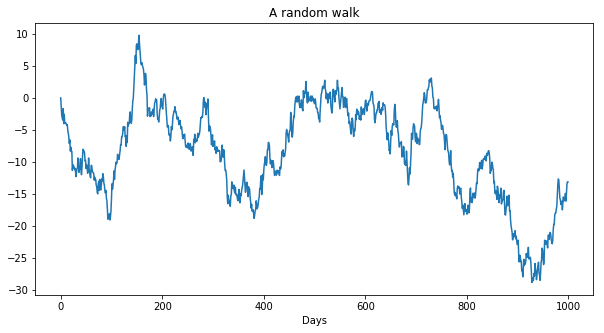

In [3]:
plt.figure(figsize=(10,5))
plt.title('A random walk')
plt.plot(x)
plt.xlabel("Days")
plt.show()

Random Walk is not a stationary time series, it would not make sense to actually find acf of it, because we define acf for stationary time series

Bu let's just do it because we can just do it, lets just try 

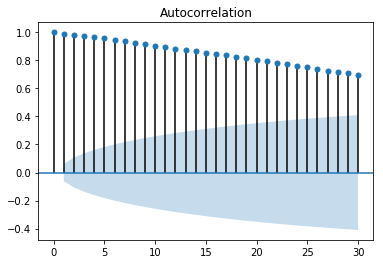

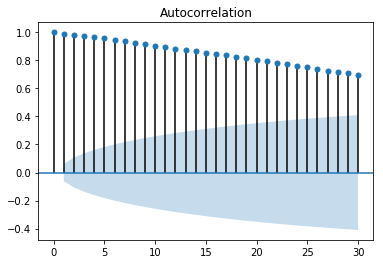

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.tsa.stattools import acf

plot_acf(x, lags=30)

As we can see, there's a high correlation, even 30 lags back, which just again shows that there's a high correlation in this data set and there is no stationarity

## Removing the trend

Now let's deviate from the topic random walk, and say 'there is a trend, definitely trending here'

Can we remove that trend? Yes we can.

$$
X_t = X_{t-1} + Z_T
$$

So i'm going to take this Xt-1 to the left hand side

$$
X_t - X_{t-1} = Z_t
$$

Let's define Xt - Xt-1 as delta
$$
\Delta X_t = X_t - X_{t-1}
$$
(this is not exactly delta, this is a difference operator) 

So difference operator applied to the Xt, DXT
$$
\Delta X_t = Z_t
$$

This is a new time series, which is equal to Zt

<b>Remember: Zt is a random noise, Zt is a purely random process

Which means that my difference data delta Xt is purely random process, which is a stationary time series, which is stationary stocastic process
</b>

So it means that if we have a random walk, simulation for a random walk, if we can take difference, the difference is going to be stationary

Let's confirm that

In [5]:
# we are going to use difference operator to remove the trend
print(np.diff(x)[:10])

# Once I do that I have another time series, which is just differences

[-1.35424365 -1.28037826 -0.52032392 -0.29197609  1.78328624 -2.36635331
  1.46138814 -1.42952049  0.04990844  0.04122243]


By ploting this, I should get a purely random process because where you saw that by just taking xt-1 to the left hand side the diffenrece is Zt

It look like a white noise.

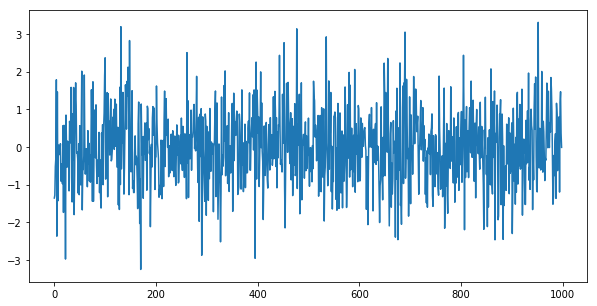

In [6]:
# Let's plot it
plt.figure(figsize=(10,5))
plt.plot(np.diff(x))
plt.show()

We can also look at a acf of the difference

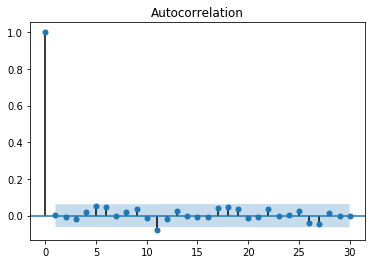

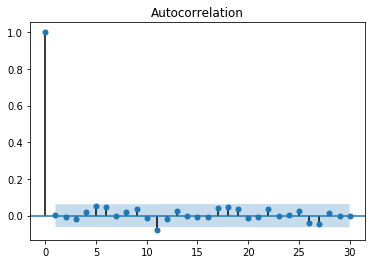

In [7]:
plot_acf(np.diff(x), lags=30)

This is a acf of the purely random process we have generated a few lectures back.